In [4]:
#load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#load the data
df = pd.read_excel('Cold and Flu Data.xlsx')
df.head()

,Item,ItemDesc,Group,Posting Year,Month No,Posting Month,Quantity,CostAmount,SalesAmount
0,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,3,March,4,1516.0,2380.00
1,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,4,April,4,1516.0,2350.25
2,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,5,May,8,3032.0,4641.00
3,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,6,June,8,3032.0,4730.25
4,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,7,July,6,2274.0,3510.50


In [6]:
#create a Date column
df['Date'] = pd.to_datetime(df['Posting Year'].astype(str)+ '-' + df['Month No'].astype(str) + '-1', errors='coerce')
df.head()

,Item,ItemDesc,Group,Posting Year,Month No,Posting Month,Quantity,CostAmount,SalesAmount,Date
0,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,3,March,4,1516.0,2380.00,2022-03-01
1,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,4,April,4,1516.0,2350.25,2022-04-01
2,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,5,May,8,3032.0,4641.00,2022-05-01
3,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,6,June,8,3032.0,4730.25,2022-06-01
4,1100112,ACTIFED WET COUGH&COLD SYRUP 100ML,OTC,2022,7,July,6,2274.0,3510.50,2022-07-01


In [7]:
#aggregate the data according to the date
df2 = df.groupby('Date')['Quantity'].sum().reset_index()
print(df2)

         Date  Quantity
0  2022-01-01       575
1  2022-02-01       390
2  2022-03-01       614
3  2022-04-01       539
4  2022-05-01       772
5  2022-06-01      1039
6  2022-07-01       706
7  2022-08-01       462
8  2022-09-01       527
9  2022-10-01       770
10 2022-11-01       664
11 2022-12-01      1084
12 2023-01-01       573
13 2023-02-01       443
14 2023-03-01       647
15 2023-04-01       640
16 2023-05-01       600
17 2023-06-01       611
18 2023-07-01       633
19 2023-08-01       577
20 2023-09-01       606
21 2023-10-01       574
22 2023-11-01       259


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      23 non-null     datetime64[ns]
 1   Quantity  23 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 496.0 bytes


<Figure size 1600x900 with 0 Axes>

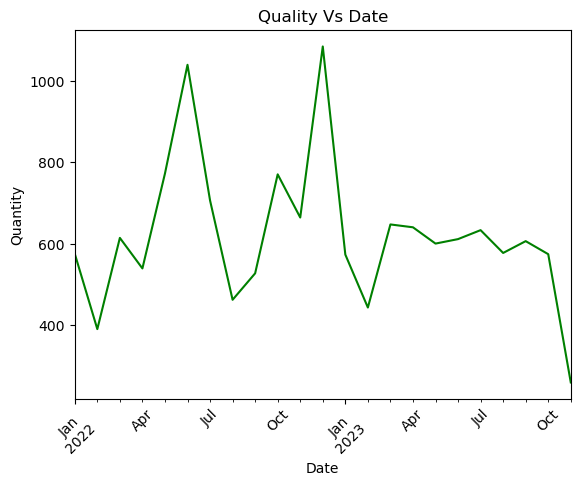

In [9]:
#plot Quality against Date
plt.figure(figsize=(16, 9))
df2.plot(x = 'Date', y = 'Quantity', kind = 'line', rot = 45, legend = False, color = 'green')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Quality Vs Date')
plt.show()

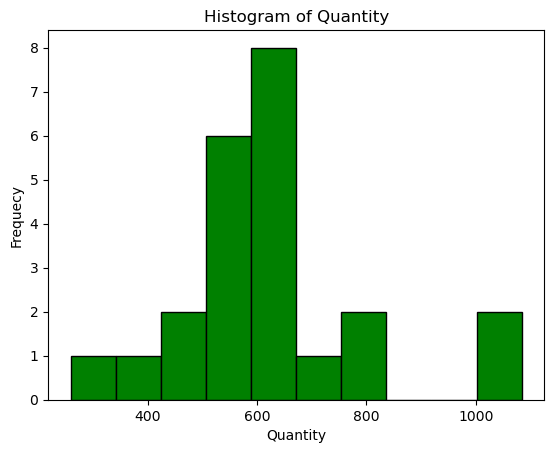

In [10]:
#check on the distribution using a Histogram
plt.hist(df2['Quantity'], bins = 10, color = 'green', edgecolor = 'black')
plt.xlabel('Quantity')
plt.ylabel('Frequecy')
plt.title('Histogram of Quantity')
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
#check stationarity of the data
def adfuller_test(sales):
    results = adfuller(sales)
    labels = ['ADF test statistic', 'p-value', 'No of lags used', 'No of observations used']
    for value, label in zip(results, labels):
        print(label +' : '+ str(value))
    if results[1] <= 0.05:
        print("It is stationary")
    else:
        print("It is not stationary")

In [13]:
adfuller_test(df2['Quantity'])

ADF test statistic : -3.290853334159304
p-value : 0.015292314309405482
No of lags used : 0
No of observations used : 22
It is stationary


# AUTO REGRESSIVE MODEL

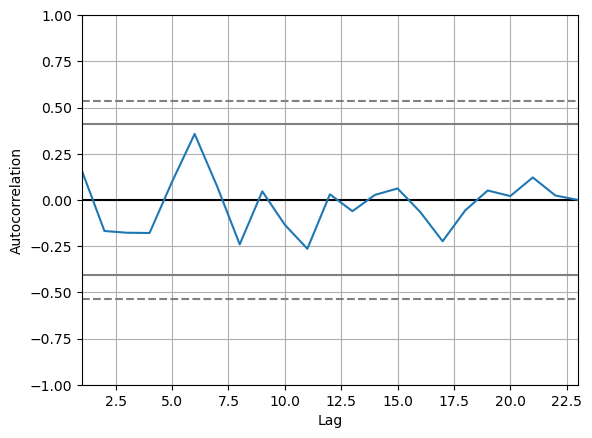

In [14]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df2['Quantity'])
plt.show()

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

C:\Users\Vee\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


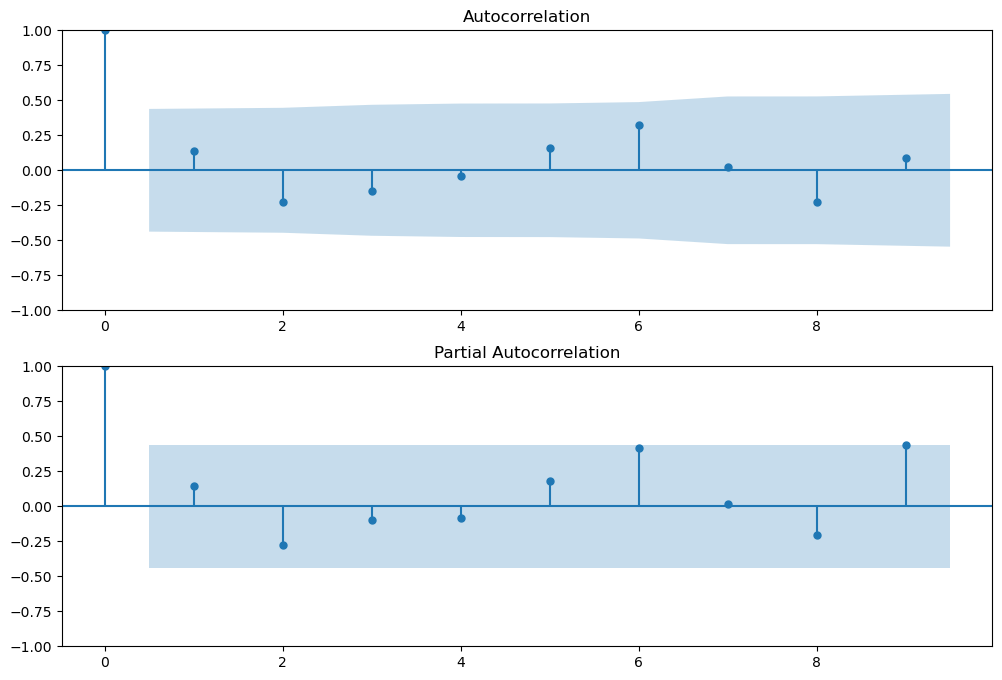

In [16]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df2['Quantity'].iloc[3:], lags= 9, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2['Quantity'].iloc[3:], lags= 9, ax = ax2)

In [17]:
from statsmodels.tsa.arima.model import ARIMA

In [18]:
df3 = df2.set_index('Date')
df3['Quantity'] = pd.to_numeric(df3['Quantity'], errors='coerce')
print(df3.isnull().sum())

Quantity    0
dtype: int64


In [19]:
train_size = int(len(df3) * 0.7) 
train, test = df3[:train_size], df3[train_size:]
print(train.dtypes)

Quantity    int64
dtype: object


In [118]:
model = ARIMA(train, order=(3,2,2))
model_fit = model.fit()

C:\Users\Vee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Vee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Vee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Vee\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Vee\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters foun

In [119]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Quantity   No. Observations:                   16
Model:                 ARIMA(3, 2, 2)   Log Likelihood                 -98.229
Date:                Thu, 30 Nov 2023   AIC                            208.458
Time:                        05:15:23   BIC                            212.292
Sample:                    01-01-2022   HQIC                           208.103
                         - 04-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3042   3043.043     -0.000      1.000   -5965.559    5962.951
ar.L2         -0.5347    925.784     -0.001      1.000   -1815.038    1813.969
ar.L3         -0.2305    701.749     -0.000      1.000   -1375.633    1375.172
ma.L1      -2.004e-05   6153.306  -3.26e-09      1.000   -1.21e+04    1.21e+04
ma.L2         -1.0000   3042.814     -0.000      1.000   -5964.806    5962.806
sigma2      5.784e+04      0.054   1.08e+06      0.000    5.78e+04    5.78e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.54
Prob(Q):                              0.73   Prob(JB):                         0.77
Heteroskedasticity (H):               1.75   Skew:                            -0.16
Prob(H) (two-sided):                  0.55   Kurtosis:                         2.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.66e+26. Standard errors may be unstable.
"""

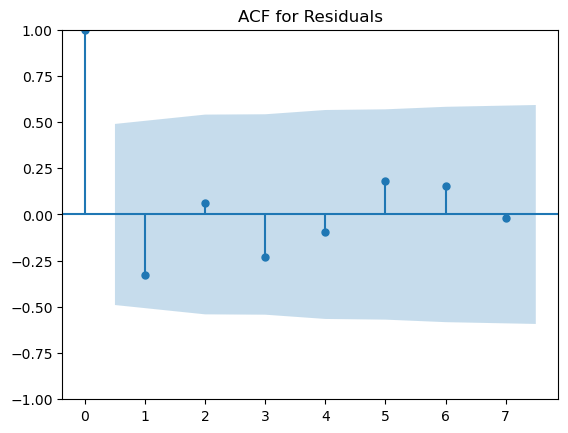

C:\Users\Vee\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


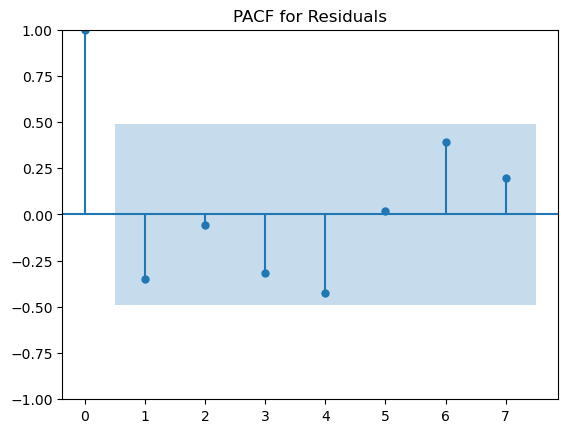

In [120]:
residuals = model_fit.resid

# Create ACF plot
plot_acf(residuals, lags=7, alpha=0.05)
plt.title('ACF for Residuals')
plt.show()

# Create PACF plot
plot_pacf(residuals, lags=7, alpha=0.05)
plt.title('PACF for Residuals')
plt.show()

In [121]:
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
predictions.head()

2023-05-01    604.615858
2023-06-01    626.477546
2023-07-01    637.489209
2023-08-01    638.583534
2023-09-01    645.219321
Freq: MS, Name: predicted_mean, dtype: float64

# EVALUATE THE MODEL

In [122]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, predictions)
print(mse)

24447.950748160256


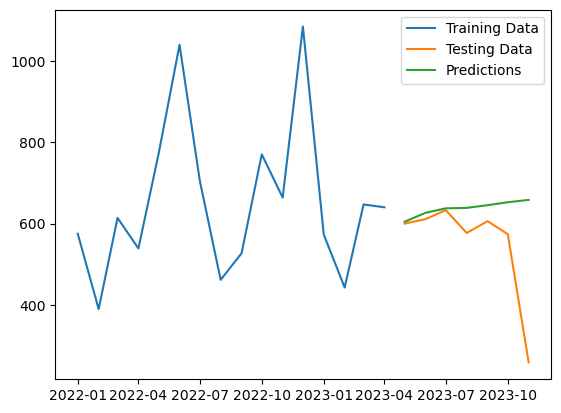

In [123]:
#visualize the data
plt.plot(train, label='Training Data')
plt.plot(test, label='Testing Data')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()

In [124]:
steps = 4
forecast = model_fit.forecast(steps=steps)

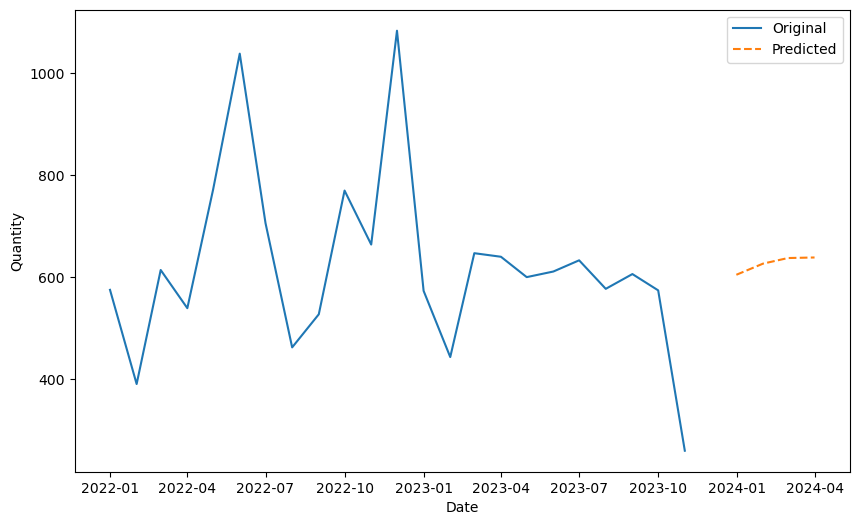

In [125]:
plt.figure(figsize=(10, 6))
plt.plot(df2['Date'], df2['Quantity'], label='Original')

# Plot the predicted values
future_dates = pd.date_range(start=df2['Date'].iloc[-1], periods=steps + 1, freq='M')[1:]
plt.plot(future_dates, forecast, label='Predicted', linestyle='dashed')

plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

In [50]:
#export predictions
df_predictions = pd.DataFrame({'Predictions': predictions}, index=future_dates)

# Export to CSV
df_predictions.to_csv('predicted_values.csv')
